In [2]:
import numpy as np
import pandas as pd
import re
import json
import matplotlib.pyplot as plt
from scipy import stats 
from PIL import*
import seaborn as sns


In [54]:
df = pd.read_json('../data/aggregated.json')


In [55]:
df.columns

Index(['address', 'price', 'bed', 'bath', 'area', 'company', 'neighborhood',
       'laundry', 'pets', 'parking', 'utilities', 'property_type',
       'year_built', 'description', 'images'],
      dtype='object')

In [7]:
df.head(30)

,address,price,bed,bath,area,company,neighborhood,laundry,pets,parking,utilities,property_type,year_built,description,images
0,3050 Birch Hollow Dr,1095.0,2,1.0,876,None,None,1.0,1.0,1.0,[],apartment,NaN,This bedroom apartments includes:\n\n→ Contemp...,[https://images.craigslist.org/00S0S_8ZkasrSZ6...
1,912 Rose Ave,2000.0,4,2.5,2000,None,None,1.0,1.0,1.0,[],house,NaN,"Stunning Ann Arbor home, perfect family house ...",[https://images.craigslist.org/00Y0Y_4tey2xf24...
2,None,695.0,3,2.0,0,None,None,1.0,0.0,1.0,[],apartment,NaN,"AWESOME Affordable. This stunning 3 bedroom, 1...",[]
3,1505 Natalie Lane near Kipling Drive,1385.0,1,1.0,800,None,None,1.0,1.0,1.0,[],apartment,NaN,Have you heard about our Stars & Stripes progr...,[https://images.craigslist.org/00p0p_1PnkFaSsW...
4,1505 Natalie Lane near Kipling Drive,1185.0,1,1.0,800,None,None,1.0,1.0,1.0,[],apartment,NaN,Have you heard about our Stars & Stripes progr...,[https://images.craigslist.org/00k0k_7n7PgfXF5...
5,None,580.0,None,NaN,0,None,None,1.0,0.0,0.0,[],apartment,NaN,\n\nFor more information & pics visit... www.r...,[https://images.craigslist.org/00D0D_cMxaHHdaB...
6,1505 Natalie Lane near Kipling Drive,1375.0,1,1.0,800,None,None,1.0,1.0,0.0,[],apartment,NaN,Have you heard about our Stars & Stripes progr...,[https://images.craigslist.org/00s0s_fSIY5lG9L...
7,310 E. Liberty St. Apt #2 near S. 5th Ave,1235.0,1,1.0,0,None,None,1.0,1.0,0.0,[],apartment,NaN,Well maintained first floor 1BR apartment avai...,[https://images.craigslist.org/01515_rQuFMdGfB...
8,10910 Independence Lane,952.0,2,1.0,1000,None,None,1.0,0.0,0.0,[],apartment,NaN,Call Now - show contact info\n x 94OR Text 94...,[https://images.craigslist.org/00p0p_31CLOpEuw...
9,3050 Birch Hollow Dr,1095.0,2,1.0,876,None,None,1.0,1.0,1.0,[],apartment,NaN,2 BD HOMESTEAD\nHomestead Commons Is In An Ide...,[https://images.craigslist.org/01010_2GBIdATh8...


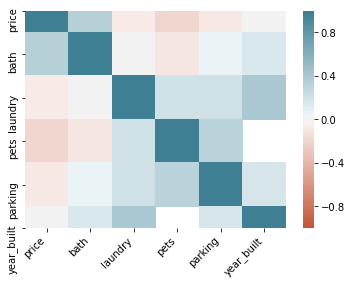

In [6]:
corr = df.corr()
ax = sns.heatmap(
    corr, 

    vmin=-1, vmax=1, center=0,

    cmap=sns.diverging_palette(20, 220, n=200),

    square=True)

ax.set_xticklabels(

    ax.get_xticklabels(),

    rotation=45,

    horizontalalignment='right'

);

In [56]:
def fixer(address):
    if address != None:
        address = address.lower()
        neary = address.find("near")
        if neary != -1:
            address =address[0:neary-1]
        return address
        

In [57]:
def cleaner(address):
    if address == None:
        return False
    stringy = address[0:1]
    if stringy.isdigit() == False:
        return False
    return True


In [63]:

df['address'] = df['address'].apply(fixer)
cleaner_df = df[df['address'].apply(cleaner)]
cleaner_df.columns


Index(['address', 'price', 'bed', 'bath', 'area', 'company', 'neighborhood',
       'laundry', 'pets', 'parking', 'utilities', 'property_type',
       'year_built', 'description', 'images'],
      dtype='object')

In [64]:
real_df = cleaner_df[['address','price']]
real_df.head(40)

,address,price
0,3050 birch hollow dr,1095.0
1,912 rose ave,2000.0
3,1505 natalie lane,1385.0
4,1505 natalie lane,1185.0
6,1505 natalie lane,1375.0
7,310 e. liberty st. apt #2,1235.0
8,10910 independence lane,952.0
9,3050 birch hollow dr,1095.0
11,2167 medford,1150.0
12,101 lake village,1560.0
